In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import graph_function as gf
import networkx as nx
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


In [3]:
from sklearn.model_selection import train_test_split

# get subgraph 

# Make voca set

In [19]:
def get_data(data, sub_num):

    subs = gf.read_subgraphs()
    num = int(sub_num)
    sub = subs[num]

    for i in data['Quesition_number'].values:
        filename = data.loc[i]['Filename']
        big_graph = nx.drawing.nx_pydot.read_dot("../data/basic_blocks/dot/" + filename + "-CFG.dot")
        data.loc[i, 'sub'+ str(sub_num)] = gf.is_subgraph(big_graph, sub)


    # shuffle data and split it as train and test
    train_df, test_df = train_test_split(data, test_size=0.2, shuffle=True)
    print("Size of data : {}" .format(data.shape))
    print("Size of train data : {}" .format(train_df.shape))
    print("Size of test data : {}" .format(test_df.shape))
    
    data['Original_Sentences'] = data['Original_Sentences'].str.lower()
    
    return data


In [20]:
data = pd.read_csv("../../data/data.csv")
print(data)
data = data.dropna(subset=['Filename'])
data['Filename'] = (data['Category'].str.replace("-", "")).str.title() + data['Filename'].str.title()

subgraph_number =4
data = get_data(data, subgraph_number)



     Quesition_number  Category          Filename  \
0                   0      AP-1  ScoresIncreasing   
1                   1      AP-1         Scores100   
2                   2      AP-1       ScoresClump   
3                   3      AP-1     ScoresAverage   
4                   4      AP-1        WordsCount   
..                ...       ...               ...   
312               312  Warmup-2          altPairs   
313               313  Warmup-2         stringYak   
314               314  Warmup-2          array667   
315               315  Warmup-2         noTriples   
316               316  Warmup-2            has271   

                                    Original_Sentences  
0    Given an array of scores, return true if each ...  
1    Given an array of scores, return true if there...  
2    Given an array of scores sorted in increasing ...  
3    Given an array of scores, compute the int aver...  
4    Given an array of strings, return the count of...  
..                   

In [21]:
def remove_duplicates(x):
    return list(dict.fromkeys(x))

voca = []
sentences = (data.Original_Sentences.values)
lower_sentences = [s.lower() for s in sentences]
sentences = [s.split() for s in lower_sentences]
import functools 
import operator

concat_words = functools.reduce(operator.add, sentences)
print(len(concat_words))

voca_set = remove_duplicates(concat_words)
print(len(voca_set))

11014
1555


# Word embedding

# GET START

In [22]:
tokenizer_obj = Tokenizer()
X = data['Original_Sentences'].values
print(X)
x_tokens = tokenizer_obj.texts_to_sequences(X)
x_tokens

['given an array of scores, return true if each score is equal or greater than the one before. the array will be length 2 or more.'
 'given an array of scores, return true if there are scores of 100 next to each other in the array. the array length will be at least 2.'
 'given an array of scores sorted in increasing order, return true if the array contains 3 adjacent scores that differ from each other by at most 2, such as with {3, 4, 5} or {3, 5, 5}.'
 "given an array of scores, compute the int average of the first half and the second half, and return whichever is larger. we'll say that the second half begins at index length/2. the array length will be at least 2. to practice decomposition, write a separate helper method int average(int[] scores, int start, int end) {  which computes the average of the elements between indexes start..end. call your helper method twice to implement scoresaverage(). write your helper method after your scoresaverage() method in the javabat text area. nor

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [35]:
def get_padded_data(data, sub_num):
    X = data['Original_Sentences'].values
    y = data['sub'+str(sub_num)].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)
    print(X_train)
    
    total_data = list(X_train) + list(X_test)
    tokenizer_obj = Tokenizer()
    tokenizer_obj.fit_on_texts(total_data)
    # pad sequences
    max_length = max([len(s.split()) for s in total_data])
    
    voca_size = len(tokenizer_obj.word_index) + 1
    
    X_train_tokens = tokenizer_obj.texts_to_sequences(X_train)
    X_test_tokens  = tokenizer_obj.texts_to_sequences(X_test)
    
    X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
    X_test_pad  = pad_sequences(X_test_tokens,  maxlen=max_length, padding='post')
    
    return X_train_pad, y_train, X_test_pad, y_test, max_length, voca_size

In [36]:
results = pd.DataFrame(columns=['subnum', 'accuracy', 'precision', 'recall', 'f1score', 'TP', 'FP', 'FN', 'TN'])


In [37]:


train_x, train_y, test_x, test_y, max_length, voca_size = get_padded_data(data, subgraph_number)

['given a string, return true if the number of appearances of "is" anywhere in the string is equal to the number of appearances of "not" anywhere in the string (case sensitive).'
 "(this is a slightly harder version of the fix34 problem.) return an array that contains exactly the same numbers as the given array, but rearranged so that every 4 is immediately followed by a 5. do not move the 4's, but every other number may move. the array contains the same number of 4's and 5's, and every 4 has a number after it that is not a 4. in this version, 5's may appear anywhere in the original array."
 "return true if the given string contains between 1 and 3 'e' chars."
 'given an array of positive ints, return a new array of length "count" containing the first even numbers from the original array. the original array will contain at least "count" even numbers.'
 'return true if the array contains, somewhere, three increasing adjacent numbers like .... 4, 5, 6, ... or 23, 24, 25.'
 'given a strin

## Prepare the data for training

In [38]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
EMBEDDING_DIM = 100

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(voca_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [40]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [41]:

history = model.fit(train_x, train_y, 
                    batch_size=8, epochs=30,
                    validation_data=(test_x, test_y), 
                    validation_steps=30)

Train on 210 samples, validate on 70 samples
Epoch 1/30
210/210 [==============================] - 4s 19ms/sample - loss: 0.6824 - acc: 0.6952 - val_loss: 0.6734 - val_acc: 0.7143
Epoch 2/30
210/210 [==============================] - 3s 15ms/sample - loss: 0.6664 - acc: 0.6952 - val_loss: 0.6513 - val_acc: 0.7143
Epoch 3/30
210/210 [==============================] - 3s 16ms/sample - loss: 0.6464 - acc: 0.6952 - val_loss: 0.6288 - val_acc: 0.7143
Epoch 4/30
210/210 [==============================] - 3s 16ms/sample - loss: 0.6240 - acc: 0.6952 - val_loss: 0.6056 - val_acc: 0.7143
Epoch 5/30
210/210 [==============================] - 3s 16ms/sample - loss: 0.6146 - acc: 0.6952 - val_loss: 0.6007 - val_acc: 0.7143
Epoch 6/30
210/210 [==============================] - 3s 16ms/sample - loss: 0.6106 - acc: 0.6952 - val_loss: 0.6015 - val_acc: 0.7143
Epoch 7/30
210/210 [==============================] - 3s 16ms/sample - loss: 0.6046 - acc: 0.6952 - val_loss: 0.5931 - val_acc: 0.7143
Epoch 8/30

In [42]:
history.history['val_acc']


[0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.7285714,
 0.74285716,
 0.7714286,
 0.75714284,
 0.7714286,
 0.7285714,
 0.74285716,
 0.7285714,
 0.71428573,
 0.7285714,
 0.74285716,
 0.74285716,
 0.74285716,
 0.74285716,
 0.75714284,
 0.75714284,
 0.75714284,
 0.74285716]

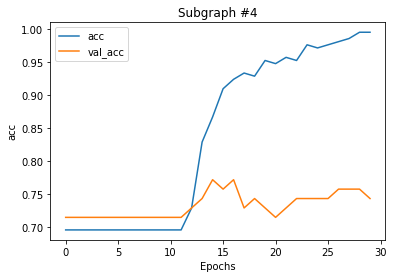

| TP = 44 | FP = 12 | 
| FN = 6 | TN = 8 |
Accuracy= 0.7428571428571429
precision =  0.7857142857142857
recall =  0.88
F1_score =  0.830188679245283


In [43]:
import matplotlib.pyplot as plt

def plot_graphs(history, string, subgraph_number):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.title("Subgraph #"+str(subgraph_number))
    plt.legend([string, 'val_'+string])
    
    plt.savefig("subgraph_num"+str(subgraph_number)+".png", bbox_inches='tight', format="png")
    plt.show()
    plt.close() 
    
plot_graphs(history, 'acc', subgraph_number)

#############################################################

y_predict = model.predict(test_x)

TN = 0; FP = 0; FN = 0; TP = 0;

for idx in range(len(y_predict)):  
    predict_val = (y_predict[idx])
    
    if(predict_val > 0.5):
        predict_val = 1
    else:
        predict_val = 0
    
    actual_val = int(test_y[idx])

    if((actual_val == 1) and (predict_val== test_y[idx])):
        TP += 1 #TP
    elif((actual_val == 0) and (predict_val == test_y[idx])):
        TN += 1  #TN
    elif((actual_val == 0) and (predict_val != test_y[idx])):
        FP += 1 # FP
    elif((actual_val == 1) and (predict_val != test_y[idx])):
        FN += 1 # FN

print('| TP = {0} | FP = {1} | \n| FN = {2} | TN = {3} |'.format(TP, FP, FN, TN))

accuracy = (TP+TN)/(TP+FN+FP+TN)
print("Accuracy=", accuracy)

try:
    precision = TP / (FP + TP)
    print("precision = ", precision)
except ZeroDivisionError:
    precision = -1
    print ("divide by zero")
    
try:
    recall = TP / (FN + TP)
    print("recall = ", recall)
except ZeroDivisionError:
    recall = -1
    print ("divide by zero")

try:
    f1_score = 2 * (precision * recall) / (precision + recall)
    print("F1_score = ", f1_score)
except ZeroDivisionError:
    f1_score = -1
    print ("divide by zero")





In [44]:

new_df = pd.DataFrame({'subnum': [subgraph_number],
                       'accuracy': [accuracy], 
                       'precision': [precision],
                       'recall'   : [recall],
                       'f1score'  : [f1_score], 
                       'TP': [TP],
                       'FP': [FP],
                       'FN': [FN],
                       'TN': [TN]})

# for appending df2 at the end of df1 
results = results.append(new_df, ignore_index = True) 

In [45]:
results

,subnum,accuracy,precision,recall,f1score,TP,FP,FN,TN
0,4,0.742857,0.785714,0.88,0.830189,44,12,6,8


In [ ]:
results.to_csv("results.csv", header=True)